# 5- Yapay Sinir Ağları (Neural Networks)

## TEORİ

**İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.**

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv"
diabetes = pd.read_csv(url)
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var mı?

False

In [5]:
df['Outcome'].value_counts() # outcome degerlerinin durumu

0    500
1    268
Name: Outcome, dtype: int64

/home/mrkizmaz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


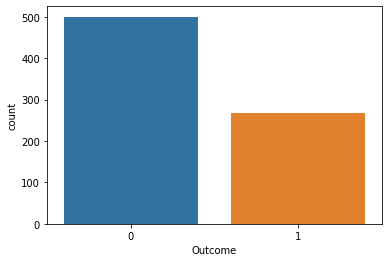

In [6]:
sns.countplot(df['Outcome']);

In [7]:
df.describe().T # verisetinin istatiksel bilgileri

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Model Kurulumu ve Tahminleme

In [8]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# dönüstürme islemleri
scaler = StandardScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled[0:5]

array([[-0.52639686, -1.15139792, -3.75268255, -1.32277365, -0.70120553,
        -4.13525578, -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485,  0.23350519, -0.70120553,
        -0.48916881,  2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , -0.09071957,  0.01344832,
        -0.42452187,  0.54916055, -0.94893896],
       [-1.13052335,  1.2541786 , -1.04961706, -1.32277365, -0.70120553,
        -1.30372015, -0.63929127,  2.79212217],
       [ 0.68185612,  0.41066475,  0.57222224,  1.07648956,  2.48460077,
         1.83812075, -0.68682934,  1.13909516]])

In [10]:
# model kurulumu
mlpc = MLPClassifier().fit(X_train_scaled, y_train)
mlpc

MLPClassifier()

In [11]:
mlpc.score(X_test_scaled, y_test) # modelin anlamlılık degeri

0.7467532467532467

In [12]:
# tahminleme
y_pred = mlpc.predict(X_test_scaled)
skor = accuracy_score(y_test, y_pred)
skor # dogruluk skoru

0.7467532467532467

In [13]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



### Model Tuning

In [14]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        ~/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
 

In [17]:
# optimum parametrelerin elde edilmesi
mlpc_params = {'alpha': [0.1, 0.01, 0.2, 0.5, 1],
               'hidden_layer_sizes': [(10,10,10),
                                     (100,100),
                                     (5, 3)],
                'solver': ['lbfgs', 'adam', 'sgd'],
                'activation': ['relu', 'logistic']}

In [18]:
mlpc = MLPClassifier()
mlpc_cv = GridSearchCV(mlpc,
                       mlpc_params,
                       cv = 10,
                       n_jobs = -1).fit(X_train_scaled, y_train)
                       
mlpc_cv # 4-5 dk. sürebilir!

/home/mrkizmaz/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/mrkizmaz/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/mrkizmaz/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
S

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.2, 0.5, 1],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100),
                                                (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']})

In [19]:
mlpc_cv.best_params_ # en iyi parametreler

{'activation': 'logistic',
 'alpha': 1,
 'hidden_layer_sizes': (5, 3),
 'solver': 'lbfgs'}

In [20]:
# optimum parametreleri ile model kurulumu,
mlpc_model = MLPClassifier(activation = 'logistic',
                           alpha = 1,
                           hidden_layer_sizes = (5, 3),
                           solver = 'lbfgs').fit(X_train_scaled, y_train)
mlpc_model

MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(5, 3),
              solver='lbfgs')

In [21]:
# tahminleme
y_pred = mlpc_model.predict(X_test_scaled)
dogSkor = accuracy_score(y_test, y_pred)
dogSkor # dogruluk skoru

0.7532467532467533

## SONUÇ

Bu projede, belirli değerler göz önünde bulundurularak bir kişinin hasta olup olmadığını tahmin etmek için Yapay Sinir Ağları Sınıflandırıcı modeli kullanıldı.
* Modelin optimum dogruluk skoru: **0.7532467532467533**